# 01.Extraccion de Datos

## Precio Historico del Dolar
Vamos a utilizar yahoo finance para extraer el precio historico del dolar de la siguiente manera:

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Extraer los datos de Yahoo Finance de los ultimos 5 años del dolar en COP
start = datetime.datetime.now() - datetime.timedelta(days=5*365)
end = datetime.datetime.now()
ticker = 'COP=X'  # Ticker para el dólar en COP
# Descargar los datos
data = yf.download(ticker, start=start, end=end)
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,COP=X,COP=X,COP=X,COP=X,COP=X
Date,,,,,
2020-05-04,3954.489990,3954.540039,3912.419189,3954.489990,0
2020-05-05,3986.909912,3990.000000,3986.810059,3986.909912,0
2020-05-06,3925.750000,3959.209961,3925.000000,3925.750000,0
2020-05-07,3961.520020,3963.000000,3914.760010,3961.520020,0
2020-05-08,3919.090088,3919.379883,3917.000000,3919.090088,0


In [2]:
# Aplanar columnas
data.columns = [f"{col[0]}_{col[1]}" for col in data.columns]

# Mostrar columnas nuevas
print(data.columns)


Index(['Close_COP=X', 'High_COP=X', 'Low_COP=X', 'Open_COP=X', 'Volume_COP=X'], dtype='object')


In [7]:
data = data.reset_index()
data.head()

,index,Date,Close_COP=X,High_COP=X,Low_COP=X,Open_COP=X,Volume_COP=X
0,0,2020-05-04,3954.489990,3954.540039,3912.419189,3954.489990,0
1,1,2020-05-05,3986.909912,3990.000000,3986.810059,3986.909912,0
2,2,2020-05-06,3925.750000,3959.209961,3925.000000,3925.750000,0
3,3,2020-05-07,3961.520020,3963.000000,3914.760010,3961.520020,0
4,4,2020-05-08,3919.090088,3919.379883,3917.000000,3919.090088,0


In [11]:
# Eliminar las columnas que no son necesarias
data = data[['Date', 'Close_COP=X', 'High_COP=X', 'Low_COP=X', 'Open_COP=X']]
data.head()

,Date,Close_COP=X,High_COP=X,Low_COP=X,Open_COP=X
0,2020-05-04,3954.489990,3954.540039,3912.419189,3954.489990
1,2020-05-05,3986.909912,3990.000000,3986.810059,3986.909912
2,2020-05-06,3925.750000,3959.209961,3925.000000,3925.750000
3,2020-05-07,3961.520020,3963.000000,3914.760010,3961.520020
4,2020-05-08,3919.090088,3919.379883,3917.000000,3919.090088


In [12]:
# Calcular la media movil de 30 dias
data['SMA_30'] = data['Close_COP=X'].rolling(window=30).mean()


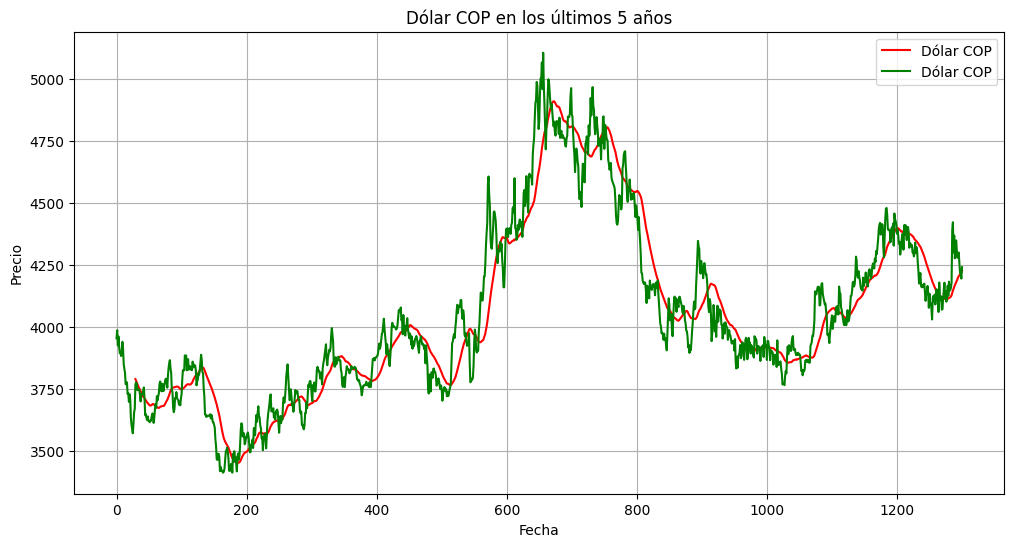

In [13]:
# Visualizacion de los datos historicos
plt.figure(figsize=(12, 6))
plt.plot(data['SMA_30'], label='Dólar COP', color='red')
plt.plot(data['Close_COP=X'], label='Dólar COP',color='green')
# mostrar labels
plt.legend()
plt.grid()
plt.title('Dólar COP en los últimos 5 años')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()

In [14]:
import sqlite3
import os

# Ensure the directory exists
db_path = '../Datos/data.db'
os.makedirs(os.path.dirname(db_path), exist_ok=True)

# Connect to the database and save the data
conn = sqlite3.connect(db_path)
data.to_sql('historic', conn, if_exists='append', index=False)
conn.close()



## Noticias Economicas

In [15]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Configuración
api_key = 'a8a6fc010f8445b7b236369fb7bf273d'
query = 'dólar OR USD'
dias = 15  # Últimos 15 días
hoy = datetime.today()

noticias = []

for i in range(dias):
    fecha = hoy - timedelta(days=i)
    desde = fecha.strftime('%Y-%m-%d')
    hasta = (fecha + timedelta(days=1)).strftime('%Y-%m-%d')

    url = (
        f'https://newsapi.org/v2/everything?q={query}'
        f'&language=es&from={desde}&to={hasta}'
        f'&sortBy=publishedAt&pageSize=3&apiKey={api_key}'
    )

    response = requests.get(url)
    data = response.json()

    # Procesar resultados si los hay
    for art in data.get('articles', []):
        noticias.append({
            'fecha': art['publishedAt'],
            'fuente': art['source']['name'],
            'titulo': art['title'],
            'descripcion': art['description'],
            'url': art['url']
        })

# Crear DataFrame
df_noticias = pd.DataFrame(noticias)

# Mostrar resultados
print(df_noticias.head(10))


                  fecha         fuente  \
0  2025-05-01T01:15:00Z  Cointelegraph   
1  2025-05-01T00:25:00Z  Cointelegraph   
2  2025-05-01T00:15:53Z  Expansion.com   
3  2025-05-01T23:58:44Z      La Nacion   
4  2025-05-01T23:41:00Z  Cointelegraph   
5  2025-05-01T23:37:00Z  Cointelegraph   
6  2025-04-30T23:25:00Z  Cointelegraph   
7  2025-04-30T23:05:00Z  Cointelegraph   
8  2025-04-30T22:53:12Z     BeInCrypto   
9  2025-04-29T23:26:48Z  Expansion.com   

                                              titulo  \
0  CZ: Para tener libertad económica, hay que ten...   
1  Bitcoin se recuperó tras datos bajistas del PI...   
2  Qué siete valores del Ibex han marcado récord ...   
3            Una primera vuelta en medio de la furia   
4  Tether reporta 1.000 millones de dólares en ga...   
5  La historia del "desacoplamiento" de las cript...   
6  3 gráficos de Ethereum mostraron una señal que...   
7  Stablecoins alcanzarían los 2 billones de dóla...   
8  El PIB de EEUU alimenta preocu

In [16]:
# Poner en formato DD/MM/YYYY
df_noticias['fecha'] = pd.to_datetime(df_noticias['fecha']).dt.strftime('%d/%m/%Y')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '01/05/2025'),
  Text(1, 0, '30/04/2025'),
  Text(2, 0, '29/04/2025'),
  Text(3, 0, '28/04/2025'),
  Text(4, 0, '27/04/2025'),
  Text(5, 0, '26/04/2025'),
  Text(6, 0, '25/04/2025'),
  Text(7, 0, '24/04/2025'),
  Text(8, 0, '23/04/2025'),
  Text(9, 0, '22/04/2025'),
  Text(10, 0, '21/04/2025'),
  Text(11, 0, '20/04/2025'),
  Text(12, 0, '19/04/2025'),
  Text(13, 0, '18/04/2025')])

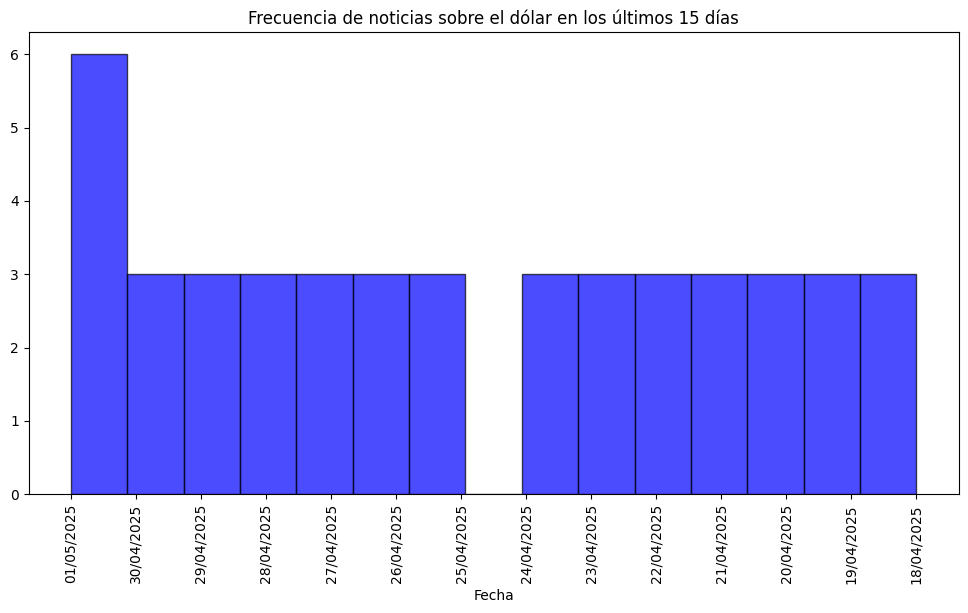

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(df_noticias['fecha'], bins=15, color='blue', alpha=0.7,edgecolor='black')
plt.xlabel('Fecha')
plt.title('Frecuencia de noticias sobre el dólar en los últimos 15 días')
plt.xticks(rotation=90)

Exportar data a la base de datos

In [19]:
import sqlite3

# Conectamos (crea el archivo si no existe)
conn = sqlite3.connect('../Datos/data.db')

# Guardamos en una tabla llamada "tweets"
df_noticias.to_sql('news', conn, if_exists='append', index=False)

# Cerramos conexión
conn.close()
